# Árvores de decisão

In [1]:
import pandas as pd

df = pd.read_csv("..\\dados\\play_tennis.csv")
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [2]:
df.sort_values("outlook", inplace=True)
df

,day,outlook,temp,humidity,wind,play
2,D3,Overcast,Hot,High,Weak,Yes
6,D7,Overcast,Cool,Normal,Strong,Yes
11,D12,Overcast,Mild,High,Strong,Yes
12,D13,Overcast,Hot,Normal,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
9,D10,Rain,Mild,Normal,Weak,Yes
13,D14,Rain,Mild,High,Strong,No
0,D1,Sunny,Hot,High,Weak,No


In [3]:
df.sort_values(by=["outlook", "wind"], inplace=True)
df

,day,outlook,temp,humidity,wind,play
6,D7,Overcast,Cool,Normal,Strong,Yes
11,D12,Overcast,Mild,High,Strong,Yes
2,D3,Overcast,Hot,High,Weak,Yes
12,D13,Overcast,Hot,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
13,D14,Rain,Mild,High,Strong,No
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes
1,D2,Sunny,Hot,High,Strong,No


In [4]:
df.outlook = df.outlook.map({"Overcast": 0, "Sunny": 1, "Rain": 2})
df.temp = df.temp.map({"Hot": 0, "Mild": 1, "Cool": 2})
df.humidity = df.humidity.map({"High": 0, "Normal": 1})
df.wind = df.wind.map({"Strong": 0, "Weak": 1})
df.play = df.play.map({"No": 0, "Yes": 1})

df

,day,outlook,temp,humidity,wind,play
6,D7,0,2,1,0,1
11,D12,0,1,0,0,1
2,D3,0,0,0,1,1
12,D13,0,0,1,1,1
5,D6,2,2,1,0,0
13,D14,2,1,0,0,0
3,D4,2,1,0,1,1
4,D5,2,2,1,1,1
9,D10,2,1,1,1,1
1,D2,1,0,0,0,0


In [5]:
df = df.loc[:, ["outlook", "temp", "humidity", "wind", "play"]]
df

,outlook,temp,humidity,wind,play
6,0,2,1,0,1
11,0,1,0,0,1
2,0,0,0,1,1
12,0,0,1,1,1
5,2,2,1,0,0
13,2,1,0,0,0
3,2,1,0,1,1
4,2,2,1,1,1
9,2,1,1,1,1
1,1,0,0,0,0


In [6]:
train_data = df.drop("play", axis=1)
train_target = df["play"]

train_data

,outlook,temp,humidity,wind
6,0,2,1,0
11,0,1,0,0
2,0,0,0,1
12,0,0,1,1
5,2,2,1,0
13,2,1,0,0
3,2,1,0,1
4,2,2,1,1
9,2,1,1,1
1,1,0,0,0


In [7]:
train_target

6     1
11    1
2     1
12    1
5     0
13    0
3     1
4     1
9     1
1     0
10    1
0     0
7     0
8     1
Name: play, dtype: int64

In [8]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="gini")
model.fit(train_data, train_target)

DecisionTreeClassifier()

In [10]:
pred = model.predict(train_data)

pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

[Text(334.8, 733.86, 'outlook <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]\nclass = Yes'),
 Text(251.10000000000002, 570.78, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Yes'),
 Text(418.5, 570.78, 'humidity <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]\nclass = No'),
 Text(167.4, 407.70000000000005, 'outlook <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = No'),
 Text(83.7, 244.62, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No'),
 Text(251.10000000000002, 244.62, 'wind <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(167.4, 81.54000000000008, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(334.8, 81.54000000000008, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(669.6, 407.70000000000005, 'wind <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = Yes'),
 Text(585.9, 244.62, 'outlook <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(502.20000000000005, 81.54000000000008, 'gini = 0.0\n

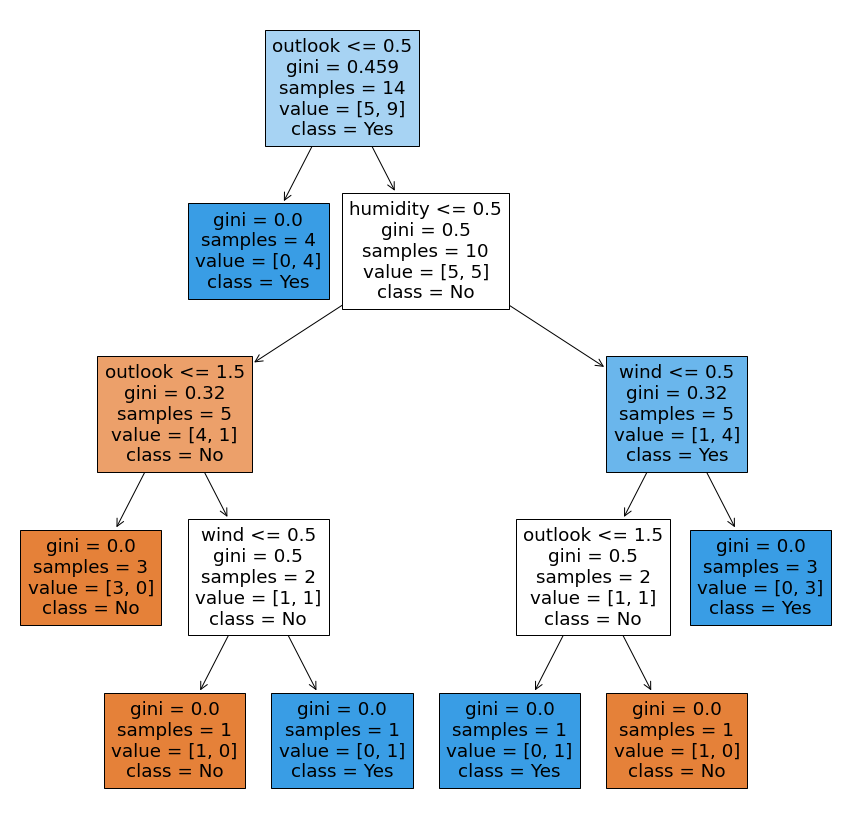

In [11]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15, 15))

tree.plot_tree(
    model,
    feature_names=train_data.columns,
    class_names=["No", "Yes"],
    filled=True
)

In [12]:
import numpy as np

new_data = pd.DataFrame(np.array([[1, 2, 0, 1], [0, 1, 1, 1]]), columns=["out", "temp", "hum", "wind"])
new_data

,out,temp,hum,wind
0,1,2,0,1
1,0,1,1,1


In [13]:
pred = model.predict(new_data)
pred

array([0, 1], dtype=int64)

In [14]:
model.predict_proba(new_data)

array([[1., 0.],
       [0., 1.]])

In [15]:
model.predict_proba(train_data)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [16]:
model = DecisionTreeClassifier(criterion="gini", max_depth=3)
model.fit(train_data, train_target)
model.predict_proba(train_data)

array([[0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ]])

[Text(313.875, 713.475, 'outlook <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]\nclass = Yes'),
 Text(209.25, 509.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Yes'),
 Text(418.5, 509.625, 'humidity <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]\nclass = No'),
 Text(209.25, 305.775, 'outlook <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = No'),
 Text(104.625, 101.92499999999995, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No'),
 Text(313.875, 101.92499999999995, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(627.75, 305.775, 'wind <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = Yes'),
 Text(523.125, 101.92499999999995, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(732.375, 101.92499999999995, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Yes')]

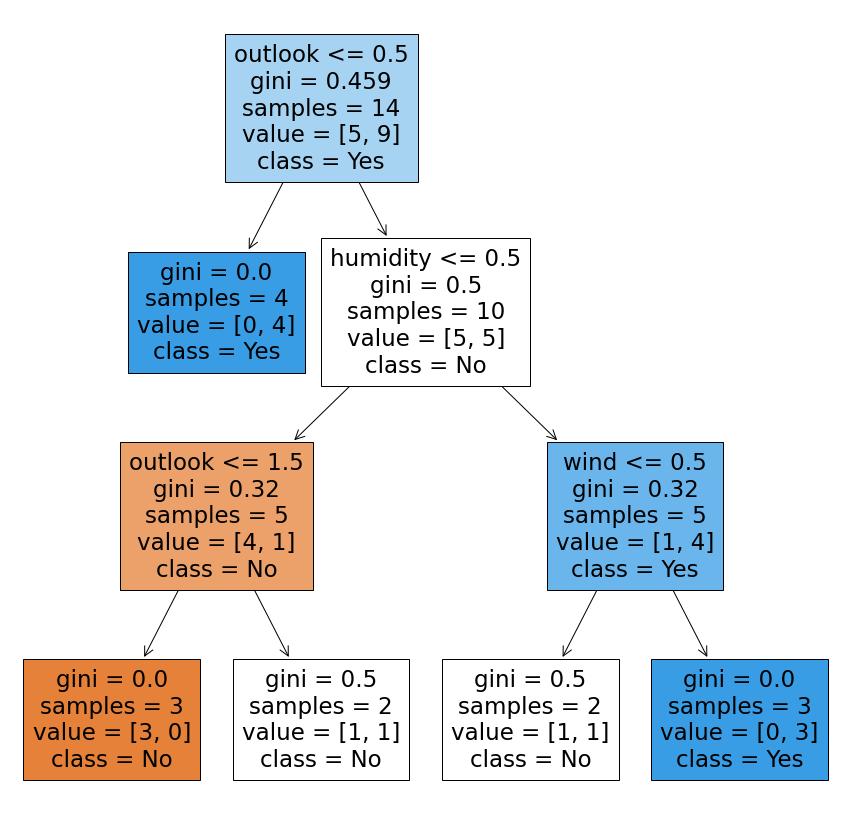

In [17]:
fig = plt.figure(figsize=(15, 15))

tree.plot_tree(
    model,
    feature_names=train_data.columns,
    class_names=["No", "Yes"],
    filled=True
)